# This code compares the one step ahead out-of-sample forecasting performance in six months, one year, one and half year and two years forecasting horizons using OLS, ANN and SVM respectively. It turns out that SVM perform best for any horizon in terms of mean squared error. But the improvement seems not signficant.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# SVM_1, this one can be deleted

In [3]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]

# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 117, test_size=12,shuffle = False)
y_predict = np.zeros(12)
#y_predict = y_predict.reshape(15,1)
length = len(y)-12
for i in range(12):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 =  X_test1.reshape(1,2)
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    from sklearn.model_selection import GridSearchCV
    estimator = SVR()
    grid = {
      "C" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      "epsilon" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      #"nu" :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
      "gamma" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
    }
    model = GridSearchCV(estimator, grid, cv=10, n_jobs=8, scoring='neg_mean_absolute_error')
   
    #y_test1 = y_test1.reshape(i+1,)
    model.fit(X_train1, y_train1)
    model.best_estimator_.fit(X_train1,y_train1)
    model.best_estimator_.score(X_train1,y_train1)
    model.best_estimator_.score(X_test1,y_test1)
    y_predict[i]=model.best_estimator_.predict(X_test1)
    

In [4]:
y_predict

array([-8.35326796, -8.70392437, -8.82183126, -9.06610938, -8.73569102,
       -8.88172665, -8.9904417 , -9.00345006, -8.68769932, -9.78700025,
       -9.57640218, -9.24493646])

In [5]:
mean_squared_error(y_predict,y_test)

0.5244839191319332

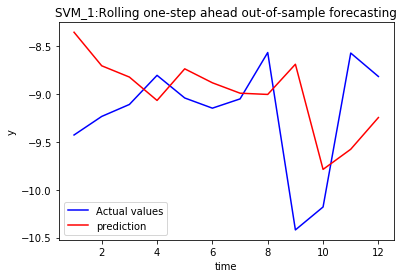

In [6]:
Z=list(range(1,13))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('SVM_1:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# OLS_1, this one can be deleted

In [7]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]
# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 117, test_size=12,shuffle = False)
y_predict = np.zeros(12)
#y_predict = y_predict.reshape(15,1)
length = len(y)-12
a = np.array([[1]])
for i in range(12):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 = X_test1.reshape(1,2)
    X_test1 = np.hstack((a,X_test1))
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    import statsmodels.api as sm
    X_train1 = sm.add_constant(X_train1)
    model= sm.OLS(y_train1, X_train1)
    # results = model.fit(cov_type='HC2')
    results = model.fit()
#     X_test1 = sm.add_constant(X_test1)
    y_predict[i]=results.predict(X_test1)

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
y_predict

array([-8.22447817, -9.00132174, -8.79331473, -8.94214324, -8.69467831,
       -8.84379252, -8.87138132, -8.86104468, -8.54379042, -9.83862179,
       -9.60308897, -8.88504737])

In [9]:
mean_squared_error(y_predict,y_test)

0.5547148637619136

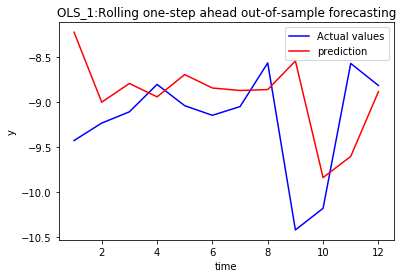

In [10]:
Z=list(range(1,13))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('OLS_1:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# SVM_0.5_variables

In [11]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]

# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 123, test_size=6,shuffle = False)
y_predict = np.zeros(6)
#y_predict = y_predict.reshape(15,1)
length = len(y)-6
for i in range(6):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 =  X_test1.reshape(1,4)
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    from sklearn.model_selection import GridSearchCV
    estimator = SVR()
    grid = {
      "C" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      "epsilon" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      #"nu" :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
      "gamma" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
    }
    model = GridSearchCV(estimator, grid, cv=10, n_jobs=8, scoring='neg_mean_absolute_error')
   
    #y_test1 = y_test1.reshape(i+1,)
    model.fit(X_train1, y_train1)
    model.best_estimator_.fit(X_train1,y_train1)
    model.best_estimator_.score(X_train1,y_train1)
    model.best_estimator_.score(X_test1,y_test1)
    y_predict[i]=model.best_estimator_.predict(X_test1)
    

In [12]:
y_predict

array([-9.07318221, -9.01666264, -8.80905727, -9.36919782, -9.40785442,
       -9.04169227])

In [13]:
mean_squared_error(y_predict,y_test)

0.7013003278084654

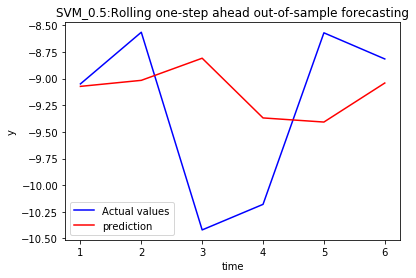

In [14]:
Z=list(range(1,7))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('SVM_0.5:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# ANN_0.5_variables

In [84]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]

# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)


X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 123, test_size=6,shuffle = False)
y_predict = np.zeros(6)
#y_predict = y_predict.reshape(15,1)
length = len(y)-6
for i in range(6):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 =  X_test1.reshape(1,4)
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    from sklearn.neural_network import MLPRegressor
    from sklearn.model_selection import GridSearchCV
    estimator = MLPRegressor(hidden_layer_sizes=(3,),solver='lbfgs',max_iter=3000)
    grid = {
        "alpha" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
#       "alpha" : [10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)],
        }
    model = GridSearchCV(estimator, grid, cv=10, n_jobs=8, scoring='neg_mean_absolute_error')
   
    #y_test1 = y_test1.reshape(i+1,)
    model.fit(X_train1, y_train1)
    model.best_estimator_.fit(X_train1,y_train1)
    model.best_estimator_.score(X_train1,y_train1)
    model.best_estimator_.score(X_test1,y_test1)
    y_predict[i]=model.best_estimator_.predict(X_test1)
    


In [67]:
y_predict

array([-8.77586634, -9.09144209, -8.55235147, -9.70728544, -9.34059286,
       -9.05966882])

In [86]:
y_predict_ANN1 = y_predict

In [89]:
mean_squared_error(y_predict_ANN1,y_test)

0.8234373698493065

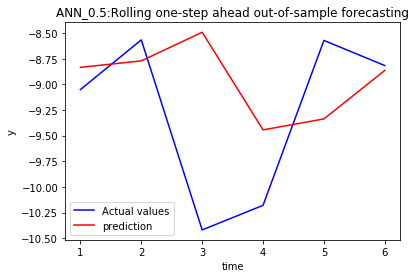

In [90]:
Z=list(range(1,7))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('ANN_0.5:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

In [91]:
# model.best_estimator_.n_layers_
# model.best_estimator_.get_params
# model.best_estimator_.coefs_
# model.best_estimator_.n_outputs_
# model.best_estimator_.out_activation_

# OLS_0.5_variables

In [92]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]
# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 123, test_size=6,shuffle = False)
y_predict = np.zeros(6)
#y_predict = y_predict.reshape(15,1)
length = len(y)-6
a = np.array([[1]])
for i in range(6):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 = X_test1.reshape(1,4)
    X_test1 = np.hstack((a,X_test1))
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    import statsmodels.api as sm
    X_train1 = sm.add_constant(X_train1)
    model= sm.OLS(y_train1, X_train1)
    # results = model.fit(cov_type='HC2')
    results = model.fit()
#     X_test1 = sm.add_constant(X_test1)
    y_predict[i]=results.predict(X_test1)

In [93]:
y_predict

array([-8.80508477, -8.79284177, -8.49913458, -9.68650061, -9.48205545,
       -8.86235302])

In [94]:
mean_squared_error(y_predict,y_test)

0.8128096314377294

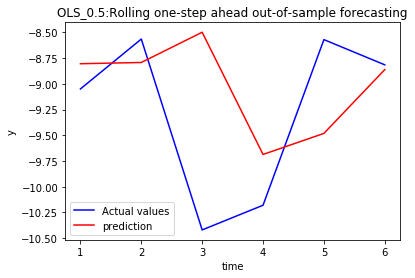

In [95]:
Z=list(range(1,7))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('OLS_0.5:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# SVM_1_variables

In [2]:
# rolling one-step ahead forecasting using observations
# data = pd.read_excel('X_selected.xlsx', header=None)
# data = np.array(data)
# Xfeature = data.values[0:147,:-1]
# Xfeature = Xfeature.reshape(147,9)
#X = data.values[0:147,:]

data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]

# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 117, test_size=12,shuffle = False)
y_predict = np.zeros(12)
#y_predict = y_predict.reshape(15,1)
length = len(y)-12
for i in range(12):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 =  X_test1.reshape(1,4)
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    from sklearn.model_selection import GridSearchCV
    estimator = SVR()
    grid = {
      "C" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      "epsilon" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      #"nu" :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
      "gamma" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
    }
    model = GridSearchCV(estimator, grid, cv=10, n_jobs=8, scoring='neg_mean_absolute_error')
   
    #y_test1 = y_test1.reshape(i+1,)
    model.fit(X_train1, y_train1)
    model.best_estimator_.fit(X_train1,y_train1)
    model.best_estimator_.score(X_train1,y_train1)
    model.best_estimator_.score(X_test1,y_test1)
    y_predict[i]=model.best_estimator_.predict(X_test1)
    

In [3]:
y_predict

array([-8.36736579, -9.09046959, -8.76773027, -8.99892685, -8.75301075,
       -8.92645477, -8.9110788 , -9.02394808, -8.81377532, -9.7440744 ,
       -9.51858922, -9.3739169 ])

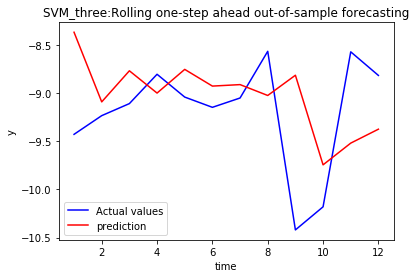

In [4]:
Z=list(range(1,13))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('SVM_1:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

In [5]:
mean_squared_error(y_predict, y_test)

0.4698591616340977

# ANN_1_variables

In [72]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]

# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)


X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 117, test_size=12,shuffle = False)
y_predict = np.zeros(12)
#y_predict = y_predict.reshape(15,1)
length = len(y)-12
for i in range(12):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 =  X_test1.reshape(1,4)
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    from sklearn.neural_network import MLPRegressor
    from sklearn.model_selection import GridSearchCV
    estimator = MLPRegressor(hidden_layer_sizes=(3,),solver='lbfgs',max_iter=3000)
    grid = {
        "alpha" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
#       "alpha" : [10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)],
        }
    model = GridSearchCV(estimator, grid, cv=10, n_jobs=8, scoring='neg_mean_absolute_error')
   
    #y_test1 = y_test1.reshape(i+1,)
    model.fit(X_train1, y_train1)
    model.best_estimator_.fit(X_train1,y_train1)
    model.best_estimator_.score(X_train1,y_train1)
    model.best_estimator_.score(X_test1,y_test1)
    y_predict[i]=model.best_estimator_.predict(X_test1)

In [73]:
y_predict

array([-8.15810413, -9.01386741, -8.70958121, -8.76044064, -8.66363797,
       -8.71782645, -8.69239887, -8.90629274, -8.57077911, -9.45309947,
       -9.2916533 , -8.8575595 ])

In [74]:
mean_squared_error(y_predict,y_test)

0.5716024781915787

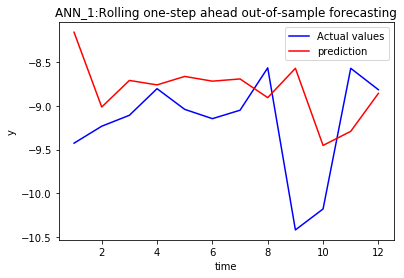

In [75]:
Z=list(range(1,13))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('ANN_1:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# OLS_1_variables

In [8]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]
# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 117, test_size=12,shuffle = False)
y_predict = np.zeros(12)
#y_predict = y_predict.reshape(15,1)
length = len(y)-12
a = np.array([[1]])
for i in range(12):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 = X_test1.reshape(1,4)
    X_test1 = np.hstack((a,X_test1))
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    import statsmodels.api as sm
    X_train1 = sm.add_constant(X_train1)
    model= sm.OLS(y_train1, X_train1)
    # results = model.fit(cov_type='HC2')
    results = model.fit()
#     X_test1 = sm.add_constant(X_test1)
    y_predict[i]=results.predict(X_test1)

In [10]:
y_predict

array([-8.19776622, -8.90136846, -8.72266036, -8.86523554, -8.6473922 ,
       -8.78920854, -8.80583441, -8.79156318, -8.5035896 , -9.64545254,
       -9.47932156, -8.8293221 ])

In [11]:
mean_squared_error(y_predict,y_test)

0.5792803389935053

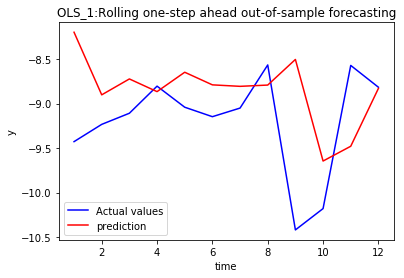

In [12]:
Z=list(range(1,13))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('OLS_1:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# SVM_1.5_variables

In [20]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]

# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 111, test_size=18,shuffle = False)
y_predict = np.zeros(18)
#y_predict = y_predict.reshape(15,1)
length = len(y)-18
for i in range(18):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 =  X_test1.reshape(1,4)
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    from sklearn.model_selection import GridSearchCV
    estimator = SVR()
    grid = {
      "C" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      "epsilon" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      #"nu" :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
      "gamma" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
    }
    model = GridSearchCV(estimator, grid, cv=10, n_jobs=8, scoring='neg_mean_absolute_error')
   
    #y_test1 = y_test1.reshape(i+1,)
    model.fit(X_train1, y_train1)
    model.best_estimator_.fit(X_train1,y_train1)
    model.best_estimator_.score(X_train1,y_train1)
    model.best_estimator_.score(X_test1,y_test1)
    y_predict[i]=model.best_estimator_.predict(X_test1)

In [21]:
y_predict
mean_squared_error(y_predict,y_test)
Z=list(range(1,19))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('SVM_1.5:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

array([-7.84764315, -7.94864475, -8.11449848, -8.30499361, -8.18153373,
       -8.53843666, -8.33193353, -8.77390622, -8.79750736, -8.99048705,
       -8.76756577, -8.92203452, -8.91900386, -8.95490937, -8.66313659,
       -9.81012878, -9.37269166, -9.04936253])

In [22]:
mean_squared_error(y_predict,y_test)

0.3924994433009507

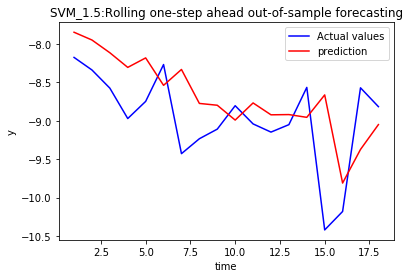

In [23]:
Z=list(range(1,19))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('SVM_1.5:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# ANN_1.5_variables

In [119]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]

# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)


X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 111, test_size=18,shuffle = False)
y_predict = np.zeros(18)
#y_predict = y_predict.reshape(15,1)
length = len(y)-18
for i in range(18):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 =  X_test1.reshape(1,4)
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    from sklearn.neural_network import MLPRegressor
    from sklearn.model_selection import GridSearchCV
    estimator = MLPRegressor(hidden_layer_sizes=(3,),solver='lbfgs',max_iter=3000)
    grid = {
        "alpha" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
#       "alpha" : [10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)],
        }
    model = GridSearchCV(estimator, grid, cv=10, n_jobs=8, scoring='neg_mean_absolute_error')
   
    #y_test1 = y_test1.reshape(i+1,)
    model.fit(X_train1, y_train1)
    model.best_estimator_.fit(X_train1,y_train1)
    model.best_estimator_.score(X_train1,y_train1)
    model.best_estimator_.score(X_test1,y_test1)
    y_predict[i]=model.best_estimator_.predict(X_test1)

In [120]:
y_predict

array([-7.79923514, -7.93889513, -8.00968498, -8.35864789, -8.55481158,
       -8.32169373, -8.17292633, -8.90505654, -8.70246125, -9.01025089,
       -8.56839729, -8.69103056, -8.74342421, -8.7295615 , -8.68669743,
       -9.60653119, -9.47970983, -8.85049504])

In [121]:

mean_squared_error(y_predict,y_test)

0.424209418793929

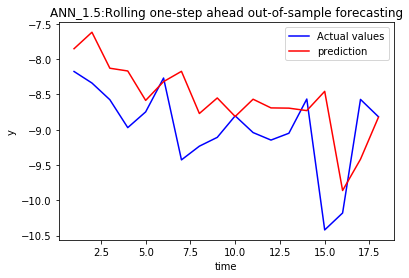

In [77]:
Z=list(range(1,19))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('ANN_1.5:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# OLS_1.5_varibles

In [24]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]
# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 111, test_size=18,shuffle = False)
y_predict = np.zeros(18)
#y_predict = y_predict.reshape(15,1)
length = len(y)-18
a = np.array([[1]])
for i in range(18):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 = X_test1.reshape(1,4)
    X_test1 = np.hstack((a,X_test1))
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    import statsmodels.api as sm
    X_train1 = sm.add_constant(X_train1)
    model= sm.OLS(y_train1, X_train1)
    # results = model.fit(cov_type='HC2')
    results = model.fit()
#     X_test1 = sm.add_constant(X_test1)
    y_predict[i]=results.predict(X_test1)

In [25]:
y_predict

array([-7.80523857, -7.8961883 , -8.06285966, -8.25997538, -8.53401649,
       -8.43603009, -8.2136528 , -8.88959039, -8.70277056, -8.82137556,
       -8.62761904, -8.76969002, -8.78471667, -8.76777024, -8.43871725,
       -9.63333047, -9.45735454, -8.80073863])

In [26]:
mean_squared_error(y_predict,y_test)

0.4646626765653439

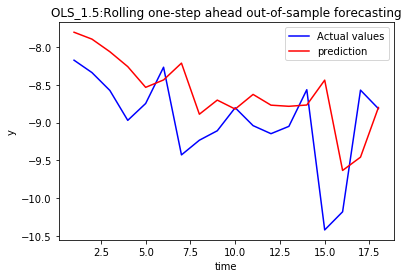

In [27]:
Z=list(range(1,19))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('OLS_1.5:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# SVM_2

In [14]:
# rolling one-step ahead forecasting using observations
# data = pd.read_excel('X_selected.xlsx', header=None)
# data = np.array(data)
# Xfeature = data.values[0:147,:-1]
# Xfeature = Xfeature.reshape(147,9)
#X = data.values[0:147,:]

data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]

# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 105, test_size=24,shuffle = False)
y_predict = np.zeros(24)
#y_predict = y_predict.reshape(15,1)
length = len(y)-24
for i in range(24):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 =  X_test1.reshape(1,4)
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    from sklearn.model_selection import GridSearchCV
    estimator = SVR()
    grid = {
      "C" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      "epsilon" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      #"nu" :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
      "gamma" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
    }
    model = GridSearchCV(estimator, grid, cv=10, n_jobs=8, scoring='neg_mean_absolute_error')
   
    #y_test1 = y_test1.reshape(i+1,)
    model.fit(X_train1, y_train1)
    model.best_estimator_.fit(X_train1,y_train1)
    model.best_estimator_.score(X_train1,y_train1)
    model.best_estimator_.score(X_test1,y_test1)
    y_predict[i]=model.best_estimator_.predict(X_test1)

In [15]:
y_predict

array([-7.38755962, -6.48813342, -7.10751249, -6.83151413, -7.53274161,
       -7.40032703, -7.91286022, -7.92637353, -8.10995257, -8.36889808,
       -8.59212512, -8.54011971, -8.38765924, -9.01697667, -8.76993954,
       -9.04258323, -8.81495553, -8.91428524, -8.91254307, -8.91796904,
       -8.76592611, -9.43214442, -9.61370101, -9.12519234])

In [17]:
mean_squared_error(y_predict,y_test)

0.5273824959803132

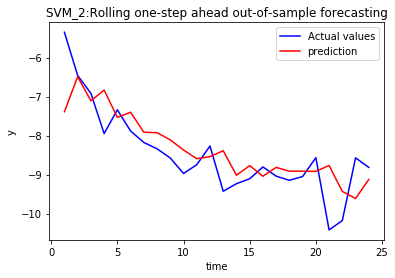

In [18]:
Z=list(range(1,25))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('SVM_2:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# ANN_2_variables

In [79]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]

# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)


X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 105, test_size=24,shuffle = False)
y_predict = np.zeros(24)
#y_predict = y_predict.reshape(15,1)
length = len(y)-24
for i in range(24):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 =  X_test1.reshape(1,4)
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    from sklearn.neural_network import MLPRegressor
    from sklearn.model_selection import GridSearchCV
    estimator = MLPRegressor(hidden_layer_sizes=(3,),solver='lbfgs',max_iter=3000)
    grid = {
        "alpha" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
#       "alpha" : [10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)],
        }
    model = GridSearchCV(estimator, grid, cv=10, n_jobs=8, scoring='neg_mean_absolute_error')
   
    #y_test1 = y_test1.reshape(i+1,)
    model.fit(X_train1, y_train1)
    model.best_estimator_.fit(X_train1,y_train1)
    model.best_estimator_.score(X_train1,y_train1)
    model.best_estimator_.score(X_test1,y_test1)
    y_predict[i]=model.best_estimator_.predict(X_test1)

In [80]:
y_predict

array([-7.47849705, -6.44522621, -6.88506094, -6.90750765, -7.71326435,
       -7.35375486, -7.81099819, -7.8146896 , -7.95826851, -8.3103815 ,
       -8.53237102, -8.52628242, -8.18438932, -8.91923514, -8.60373268,
       -8.7942178 , -8.63148153, -8.82917258, -8.78521063, -8.70100333,
       -8.4272757 , -9.70241667, -9.31682972, -8.7972967 ])

In [81]:
mean_squared_error(y_predict,y_test)

0.5996325483325385

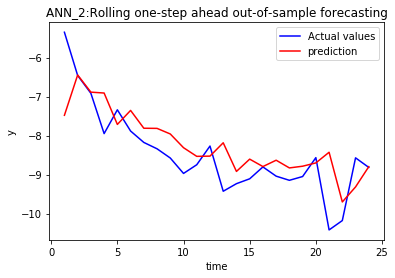

In [82]:
Z=list(range(1,25))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('ANN_2:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# OLS_2

In [19]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]
# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 105, test_size=24,shuffle = False)
y_predict = np.zeros(24)
#y_predict = y_predict.reshape(15,1)
length = len(y)-24
a = np.array([[1]])
for i in range(24):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 = X_test1.reshape(1,4)
    X_test1 = np.hstack((a,X_test1))
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    import statsmodels.api as sm
    X_train1 = sm.add_constant(X_train1)
    model= sm.OLS(y_train1, X_train1)
    # results = model.fit(cov_type='HC2')
    results = model.fit()
#     X_test1 = sm.add_constant(X_test1)
    y_predict[i]=results.predict(X_test1)

In [20]:
y_predict

array([-7.31080992, -6.15469478, -6.90928798, -6.81226192, -7.63996335,
       -7.35383721, -7.81378277, -7.8860207 , -8.05600491, -8.24207617,
       -8.51939328, -8.41047573, -8.18382822, -8.87184421, -8.70029682,
       -8.793313  , -8.6328703 , -8.78722707, -8.8031164 , -8.78799329,
       -8.47752821, -9.70206528, -9.49957045, -8.77852965])

In [21]:
mean_squared_error(y_predict,y_test)

0.5803651761153082

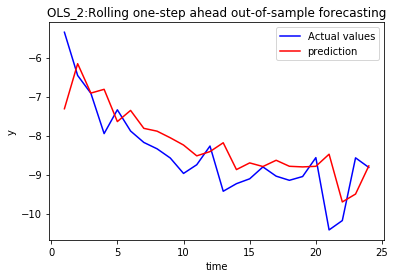

In [22]:
Z=list(range(1,25))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('OLS_2:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# SVM_3

In [23]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]

# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 93, test_size=36,shuffle = False)
y_predict = np.zeros(36)
#y_predict = y_predict.reshape(15,1)
length = len(y)-36
for i in range(36):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 =  X_test1.reshape(1,4)
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    from sklearn.model_selection import GridSearchCV
    estimator = SVR()
    grid = {
      "C" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      "epsilon" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      #"nu" :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
      "gamma" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
    }
    model = GridSearchCV(estimator, grid, cv=10, n_jobs=8, scoring='neg_mean_absolute_error')
   
    #y_test1 = y_test1.reshape(i+1,)
    model.fit(X_train1, y_train1)
    model.best_estimator_.fit(X_train1,y_train1)
    model.best_estimator_.score(X_train1,y_train1)
    model.best_estimator_.score(X_test1,y_test1)
    y_predict[i]=model.best_estimator_.predict(X_test1)

In [24]:
y_predict

array([-7.04487293, -6.81161979, -7.1246108 , -7.0251535 , -7.22711963,
       -6.80458671, -6.3271892 , -6.01787478, -5.91688407, -6.3998586 ,
       -6.97575293, -6.91821152, -7.40813814, -6.48230652, -7.21340686,
       -6.96562485, -7.73959601, -7.48511734, -7.93551645, -7.93463003,
       -8.061463  , -8.24298264, -8.53024807, -8.47043424, -8.29890336,
       -8.77220204, -8.73416029, -9.06024886, -8.82011616, -8.97574923,
       -8.94196765, -9.06344951, -8.80384574, -9.36889668, -9.38259508,
       -9.20133585])

In [26]:
mean_squared_error(y_predict,y_test)

0.5813302451307548

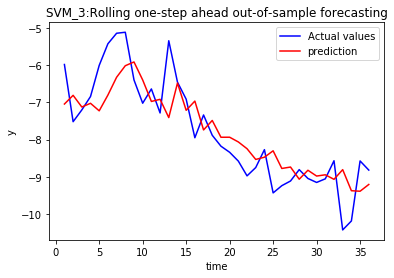

In [28]:
Z=list(range(1,37))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('SVM_3:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# OLS_3

In [29]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]
# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 93, test_size=36,shuffle = False)
y_predict = np.zeros(36)
#y_predict = y_predict.reshape(15,1)
length = len(y)-36
a = np.array([[1]])
for i in range(36):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 = X_test1.reshape(1,4)
    X_test1 = np.hstack((a,X_test1))
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    import statsmodels.api as sm
    X_train1 = sm.add_constant(X_train1)
    model= sm.OLS(y_train1, X_train1)
    # results = model.fit(cov_type='HC2')
    results = model.fit()
#     X_test1 = sm.add_constant(X_test1)
    y_predict[i]=results.predict(X_test1)

In [30]:
y_predict

array([-6.98544521, -6.72993645, -7.13600159, -6.93218415, -7.09587464,
       -6.59969332, -6.18396175, -5.82730315, -5.66080376, -6.44866887,
       -6.88832054, -6.85382178, -7.31043845, -6.22604455, -7.05276497,
       -6.98243826, -7.77785581, -7.47400091, -7.87875478, -7.97983134,
       -8.07956433, -8.28055544, -8.54458414, -8.41336489, -8.17691903,
       -8.90772619, -8.74498818, -8.82938238, -8.63954021, -8.83448091,
       -8.85594068, -8.82185773, -8.50239903, -9.72431359, -9.5216187 ,
       -8.83102092])

In [31]:
mean_squared_error(y_predict,y_test)

0.5569640563303304

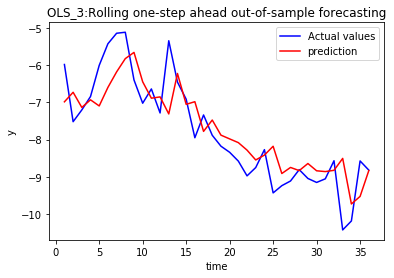

In [32]:
Z=list(range(1,37))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('OLS_3:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# SVM_4

In [33]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]

# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 81, test_size=48,shuffle = False)
y_predict = np.zeros(48)
#y_predict = y_predict.reshape(15,1)
length = len(y)-48
for i in range(48):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 =  X_test1.reshape(1,4)
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    from sklearn.model_selection import GridSearchCV
    estimator = SVR()
    grid = {
      "C" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      "epsilon" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
      #"nu" :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
      "gamma" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
    }
    model = GridSearchCV(estimator, grid, cv=10, n_jobs=8, scoring='neg_mean_absolute_error')
   
    #y_test1 = y_test1.reshape(i+1,)
    model.fit(X_train1, y_train1)
    model.best_estimator_.fit(X_train1,y_train1)
    model.best_estimator_.score(X_train1,y_train1)
    model.best_estimator_.score(X_test1,y_test1)
    y_predict[i]=model.best_estimator_.predict(X_test1)

In [34]:
y_predict

array([-7.8727488 , -7.91827225, -7.94859835, -7.82902072, -7.96529607,
       -7.98701171, -8.2206156 , -8.17479093, -8.24514628, -8.04791121,
       -8.13238447, -7.8660402 , -7.03315117, -6.97010204, -7.09506014,
       -7.07068852, -7.13830296, -6.59228849, -6.22610097, -6.02333452,
       -5.97950578, -6.58380751, -7.01789499, -6.95058584, -7.39171823,
       -6.65570032, -7.15286451, -6.90956838, -7.51975651, -7.40002147,
       -7.90691741, -7.94800722, -8.15754178, -8.39171135, -8.46464043,
       -8.43274345, -8.23576872, -9.02413194, -8.76750036, -9.12112567,
       -8.87708563, -9.07367417, -9.06619724, -9.03997014, -8.75605083,
       -9.79179761, -9.61541894, -9.21254956])

In [35]:
mean_squared_error(y_predict,y_test)

0.49639188691506186

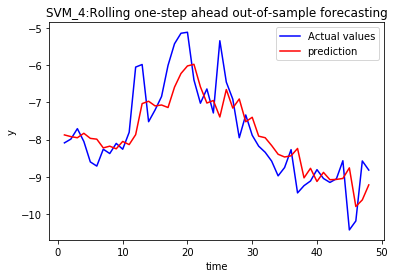

In [36]:
Z=list(range(1,49))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('SVM_4:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()

# OLS

In [37]:
data = pd.read_excel('data_used-3.xlsx',header=None)
data = np.array(data)
X = data[0:132,0:40]
X_sample = X[2:131,0:39]
PE = X_sample[:,4].reshape(129,1)
CBLR = X_sample[:,34].reshape(129,1)
y1 = X[2:131,-1].reshape(129,1)
# y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_postselected = np.hstack((PE,CBLR,y1,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_postselected)
X_postselected = Standardscaler.transform(X_postselected)
y = X[3:132,-1]
# ylag = data.values[0:147,-1]
# ylag = ylag.reshape(147,1)
# X = np.hstack((Xfeature,ylag))
# y = data.values[1:148,-1]
# y = y.reshape(147,1)

X_train, X_test, y_train, y_test = train_test_split(X_postselected, y, train_size = 81, test_size=48,shuffle = False)
y_predict = np.zeros(48)
#y_predict = y_predict.reshape(15,1)
length = len(y)-48
a = np.array([[1]])
for i in range(48):   
    X_train1 = X_postselected[0+i:length+i,:]
    #ylag1 = np.vstack((ylag[0:132+i-1,:], y_predict[i-1]))
    #ylag1 = np.vstack((ylag[0:132,:], y_predict[0:i-1]))
    y_train1 = y[0+i:length+i,]
    y_train1 =  y_train1.reshape(length,)
    X_test1 = X_test[i,:]
    X_test1 = X_test1.reshape(1,4)
    X_test1 = np.hstack((a,X_test1))
    y_test1 = y_test[i,]
    y_test1 =  y_test1.reshape(1,)
#     MaxAbsScalertrain = preprocessing.MaxAbsScaler().fit(X_train1)
#     X_train1 = MaxAbsScalertrain.transform(X_train1)
#     X_test1 = MaxAbsScalertrain.transform(X_test1)
    import statsmodels.api as sm
    X_train1 = sm.add_constant(X_train1)
    model= sm.OLS(y_train1, X_train1)
    # results = model.fit(cov_type='HC2')
    results = model.fit()
#     X_test1 = sm.add_constant(X_test1)
    y_predict[i]=results.predict(X_test1)

In [38]:
y_predict

array([-7.81084325, -7.88195974, -7.85832146, -7.77991622, -7.89967836,
       -8.07937796, -8.27744633, -8.25107066, -8.34121383, -8.06667881,
       -8.16621951, -7.85456508, -7.0235965 , -6.74746201, -7.15325893,
       -6.94223259, -6.91646672, -6.43726026, -6.06119812, -5.77978983,
       -5.68794445, -6.52807352, -7.01261359, -6.97751611, -7.39361053,
       -6.39297436, -7.04490258, -7.03154964, -7.83077004, -7.49075855,
       -7.87979272, -7.99852193, -8.12793341, -8.3176777 , -8.57301394,
       -8.40176945, -8.16459307, -8.89151056, -8.76851346, -8.89741489,
       -8.68616877, -8.84849703, -8.84433465, -8.85992324, -8.59325384,
       -9.81129485, -9.60368591, -8.99794168])

In [40]:
mean_squared_error(y_predict,y_test)

0.4873535855611779

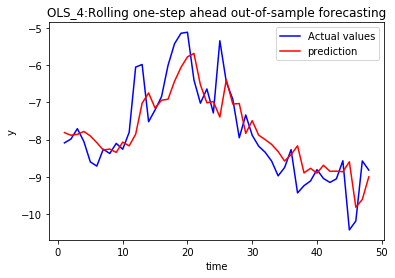

In [41]:
Z=list(range(1,49))
plt.plot(Z, y_test, color='b', label='Actual values')
plt.plot(Z, y_predict, color='r', label='prediction')
plt.xlabel('time')
plt.ylabel('y')
plt.title('OLS_4:Rolling one-step ahead out-of-sample forecasting')
plt.legend()
plt.show()